# Pyramid scheme

#### WHAT IS PYRAMID SCHEME?


Foundation of a pyramid scheme is to create a tree structure and joining members at every node. Members earn money through a commission based project which extracts money from the members who are joined at the child nodes.

A company sits at the root node and appoints pilot at immediate child node who execute the scheme for the company. These are the people who we often know as the famous "Deepak Sir, Sharma Ji" who claim to be a common man who actually benefited a lot from this scheme. Their target is to motivate others to join the system and become rich.

Consider the following variables

cost_price: cost price of the product

profit_markup: Is the profit markup which the company tries to achieve, such as three times the cost_price.

selling_price: This is the amount which potential customer pays to become the member of the scheme

selling_price = profit_markup*cost_price

sales_commision: What a member earns when he adds another member in the chain. The payment is cumulative as all members above the leaf node earn the commission.

Net Profit for the company on each sale

result = selling_price - cost_price - (depth_of_tree-1)*sales_commision

Based on the above model, the net sales commission increases with the depth of tree for a chain increases. If the profit amount is negative, it will not make economic sense for the company to invest in that chain.

And pilot will try to spin off another chain below him to keep the chain profitable

### Exploratory data analysis

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

In [2]:
df1 = pd.read_csv("/content/pyramid_scheme.csv")
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 500 rows and 6 columns


In [3]:
df1.head()

,Unnamed: 0,cost_price,profit_markup,depth_of_tree,sales_commission,profit
0,1,3500,2,19,1000,-14500
1,2,3500,2,13,1000,-8500
2,3,3500,4,5,1000,6500
3,4,3500,4,28,1000,-16500
4,5,3500,2,22,1000,-17500


In [4]:
df1.sales_commission.value_counts()

,count
sales_commission,
1000,500


In [5]:
df1.cost_price.value_counts()

,count
cost_price,
3500,500


In [6]:
df1.profit_markup.value_counts()

,count
profit_markup,
4,139
2,138
3,113
5,110


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        500 non-null    int64
 1   cost_price        500 non-null    int64
 2   profit_markup     500 non-null    int64
 3   depth_of_tree     500 non-null    int64
 4   sales_commission  500 non-null    int64
 5   profit            500 non-null    int64
dtypes: int64(6)
memory usage: 23.6 KB


In [8]:
df1.size

3000

In [9]:
df1.columns

Index(['Unnamed: 0', 'cost_price', 'profit_markup', 'depth_of_tree',
       'sales_commission', 'profit'],
      dtype='object')

In [10]:
df1.ndim

2

In [11]:
df1.isnull().sum()

,0
Unnamed: 0,0
cost_price,0
profit_markup,0
depth_of_tree,0
sales_commission,0
profit,0


# Heatmaps

<Axes: >

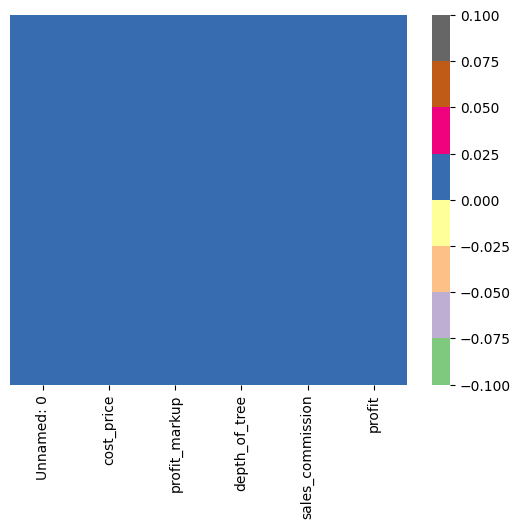

In [12]:
#bars in the graph indicate null values...(in this graph there are none)
sns.heatmap(df1.isnull(),yticklabels=False,cbar=True,cmap="Accent")

Observation(s):

1)There are no null values and therefor the graph is empty.

<Axes: >

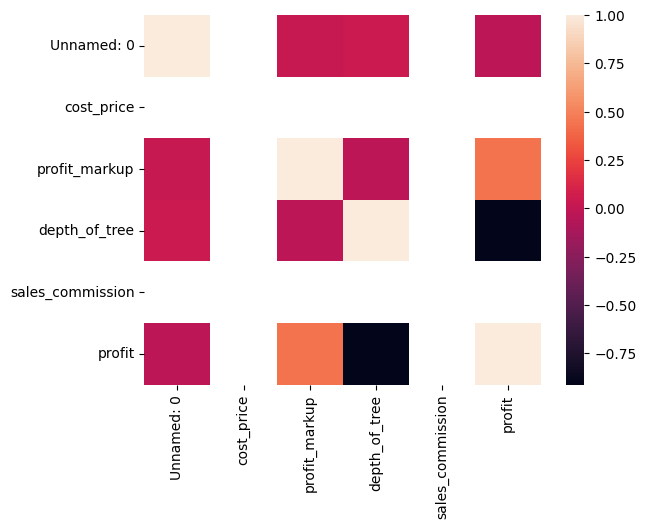

In [13]:
#finding the corelation among various features
sns.heatmap(df1.corr())

Observtion(s):

1) From this graph we can say that profit markup and profit is averagely related.

2) Profit and depth of the tree is not highly related



# Countplots

<Axes: xlabel='cost_price', ylabel='count'>

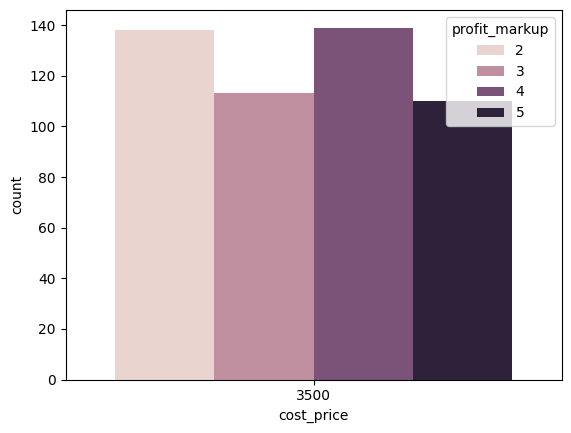

In [14]:
sns.countplot(x="cost_price",hue="profit_markup",data=df1)

Observtion(s):

1) We can say that the count of profit_markup value of 2 & 4 is the highest , it means that ,most of the people got twice the cost price and four times the cost price

# Bar plot

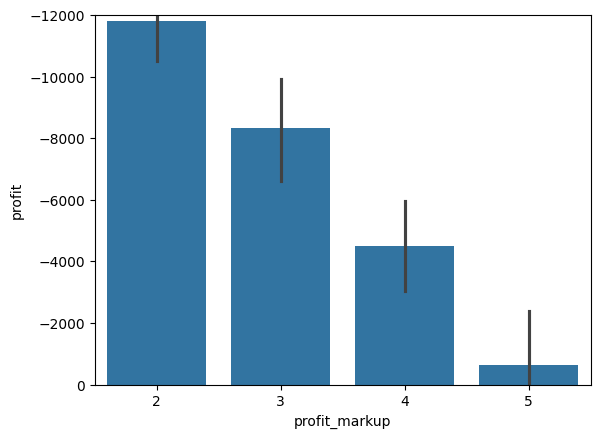

In [15]:
sns.barplot(x="profit_markup",y="profit",data=df1)
plt.ylim(0,-12000)
plt.ylabel("profit")
plt.xlabel("profit_markup")
plt.show()

Observtion(s):

1) People who had markup value as 2 had the highest negative profit.

2) People who had markup value as 5 had the lowest negative profit.



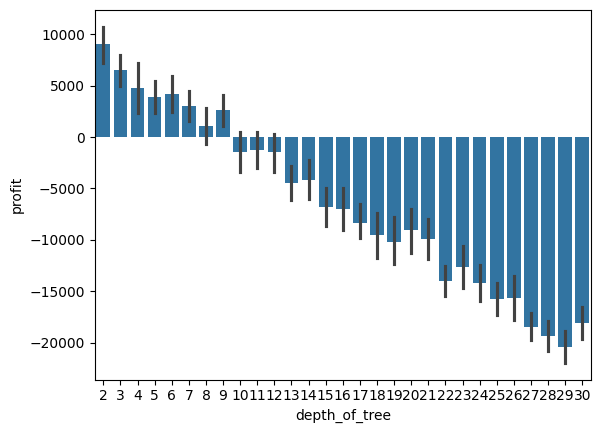

In [16]:
sns.barplot(x="depth_of_tree",y="profit",data=df1)
plt.ylabel("profit")
plt.xlabel("depth_of_tree")
plt.show()

Observation(s):

1) We can say that as the depth of the tree increases, we keep getting negative profits.

Text(0.5, 0, 'depth_of_tree')

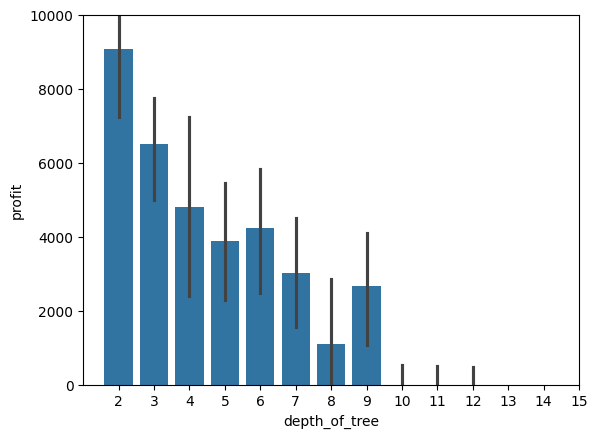

In [17]:
sns.barplot(x="depth_of_tree",y="profit",data=df1)
plt.ylim(0,10000)
plt.xlim(-1,13)
plt.ylabel("profit")
plt.xlabel("depth_of_tree")

Observation(s):

1) We can say that for the depth of the tree ranging from 2-9 we get positive profit.

2) For depth of the tree 2 we get the highest profit.

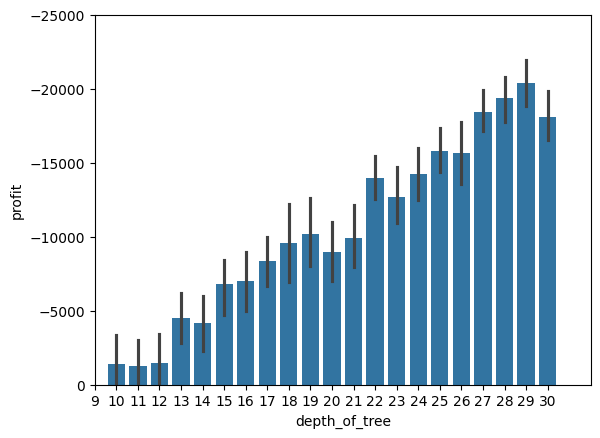

In [18]:
sns.barplot(x="depth_of_tree",y="profit",data=df1)
plt.ylim(0,-25000)
plt.xlim(7,30)
plt.ylabel("profit")
plt.xlabel("depth_of_tree")
plt.show()

Observation(s):

1) We can say that for the higher depths i.e greater than 10 we get negative profits.

# Box-plot

<Axes: xlabel='profit_markup', ylabel='profit'>

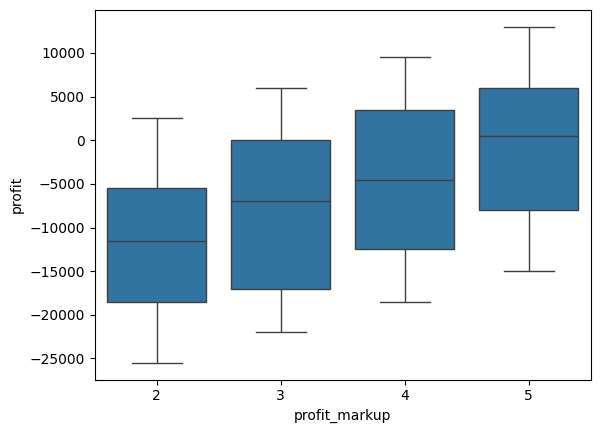

In [19]:
sns.boxplot(x="profit_markup",y="profit",data=df1)

# Violin-plot

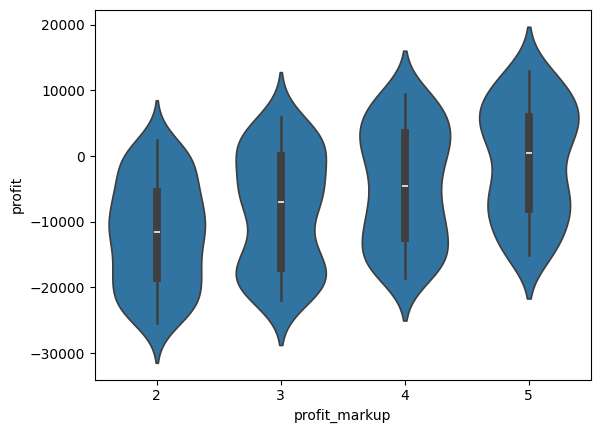

In [21]:
sns.violinplot(x="profit_markup",y="profit",data=df1)
plt.show()

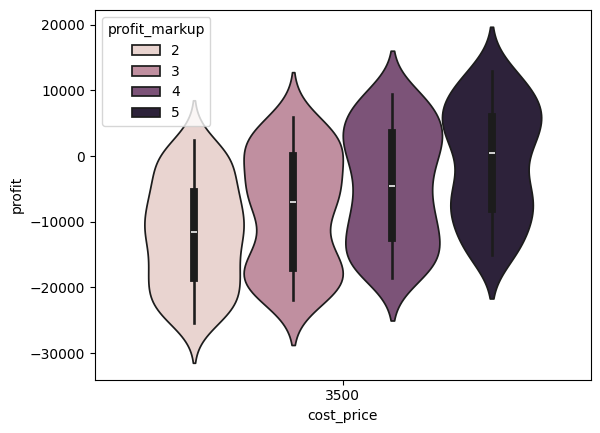

In [23]:
sns.violinplot(x="cost_price",y="profit",hue="profit_markup",data=df1)
plt.show()